In [1]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import pygal
%matplotlib inline

In [3]:
train = pd.read_csv('TrainDataForMotionbtw0-4.csv')

In [4]:
positions = ['Position_0', 'Position_1', 'Position_2', 'Position_3', 'Position_4', 'Resting_Position']

In [5]:
set(train['Label'])

{'Position_0',
 'Position_1',
 'Position_2',
 'Position_3',
 'Position_4',
 'Resting_Position'}

In [6]:
dataset = []

In [7]:
for pos in positions:
    dataset.append(train[train['Label']==pos])

In [8]:
dataset[0].head()

,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Label
0,"[-7, 6, -6]","[-1, 16, -7]","[8, 6, 4]","[0, 2, 0]","[1, -7, 10]","[3, -7, 10]","[3, -1, 18]","[3, -4, 16]",Position_0
1,"[-6, 4, 0]","[-2, 9, 2]","[4, 1, 4]","[0, -2, 2]","[0, 0, -5]","[3, -13, 0]","[8, -4, -1]","[-1, -1, 0]",Position_0
2,"[-6, 4, -10]","[-3, 14, -13]","[0, 9, -6]","[-4, 3, -8]","[2, -2, 2]","[4, -6, 1]","[6, -5, 0]","[0, 0, 0]",Position_0
3,"[-13, 5, -1]","[-5, 29, 7]","[10, 6, 2]","[-1, 2, 1]","[-9, -2, -7]","[-4, -19, -6]","[7, -5, 2]","[-2, -2, -3]",Position_0
4,"[1, 12, 13]","[9, 18, 33]","[11, 4, 20]","[5, 8, 12]","[0, -13, 5]","[4, -17, 6]","[8, -14, 6]","[0, -9, 0]",Position_0


In [9]:
def captureData(d,pos):
    t = d.replace('[','').replace(']','').split(',')
    return int(t[pos])
def getListofPoints(positionList):
    x = []
    y = []
    z = []
    for i,j in positionList:
        t = [captureData(j[i],2) for i in range(0,8)]
        x.append(st.mean([captureData(j[i],0) for i in range(0,8)]))
        y.append(st.mean([captureData(j[i],1) for i in range(0,8)]))
        z.append(st.mean([captureData(j[i],2) for i in range(0,8)]))
    return x,y,z

In [10]:
x,y,z = getListofPoints(dataset[0].iterrows())

In [11]:
pos_dict = {}

In [74]:
for data,pos in zip(dataset,positions):
    x,y,z = getListofPoints(data.iterrows())
    pos_dict[pos] = [x,y,z]
    print(pos)

Position_0
Position_1
Position_2
Position_3
Position_4
Resting_Position


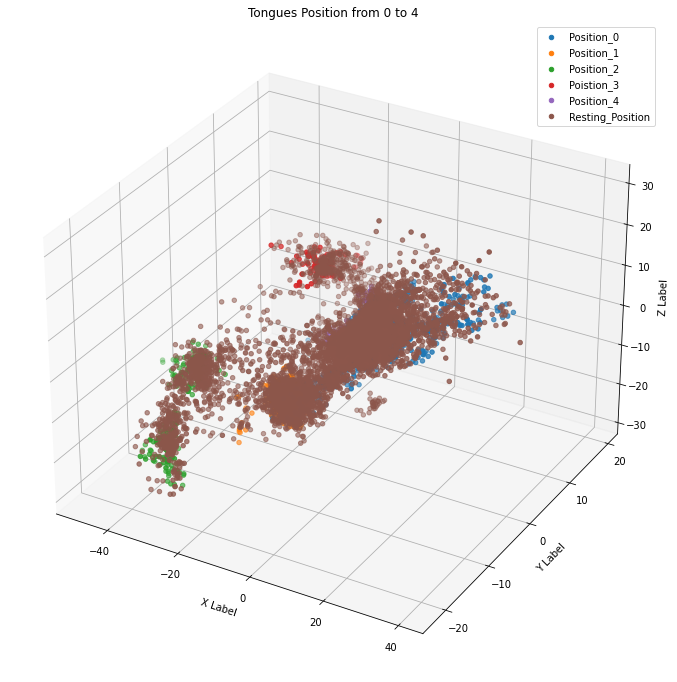

In [114]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos_dict['Position_0'][0],pos_dict['Position_0'][1],pos_dict['Position_0'][2])
ax.scatter(pos_dict['Position_1'][0],pos_dict['Position_1'][1],pos_dict['Position_1'][2])
ax.scatter(pos_dict['Position_2'][0],pos_dict['Position_2'][1],pos_dict['Position_2'][2])
ax.scatter(pos_dict['Position_3'][0],pos_dict['Position_3'][1],pos_dict['Position_3'][2])
ax.scatter(pos_dict['Position_4'][0],pos_dict['Position_4'][1],pos_dict['Position_4'][2])
ax.scatter(pos_dict['Resting_Position'][0],pos_dict['Resting_Position'][1],pos_dict['Resting_Position'][2])
#ax.scatter(x,y,z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Tongues Position from 0 to 4')

plt.gca().legend(('Position_0','Position_1','Position_2','Poistion_3','Position_4','Resting_Position'))

plt.savefig("0-4 with resting_position.png")
plt.show()